In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
!pip install jcopml

     |████████████████████████████████| 101 kB 4.3 MB/s 
  Created wheel for jcopml: filename=jcopml-1.1.10-py2.py3-none-any.whl size=33230 sha256=e4f8176ea4aa1a837465a688b634f58eae5916aa04e9558178b97e1fa3681576
  Stored in directory: /root/.cache/pip/wheels/1e/b0/7a/2e3db99fcf3707a61b80c5193e1155acc8eaf730c510424c6b
Successfully built jcopml


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/carprice.csv',index_col='ID')


In [6]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


In [7]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_kmpl           2
Engine_CC             36
Power_bhp            142
Seats                 42
Price                  0
dtype: int64

,missing_value,%
Name,0,0.00
Location,0,0.00
Year,0,0.00
Kilometers_Driven,0,0.00
Fuel_Type,0,0.00
Transmission,0,0.00
Owner_Type,0,0.00
Mileage_kmpl,2,0.03
Engine_CC,36,0.60
Power_bhp,142,2.39


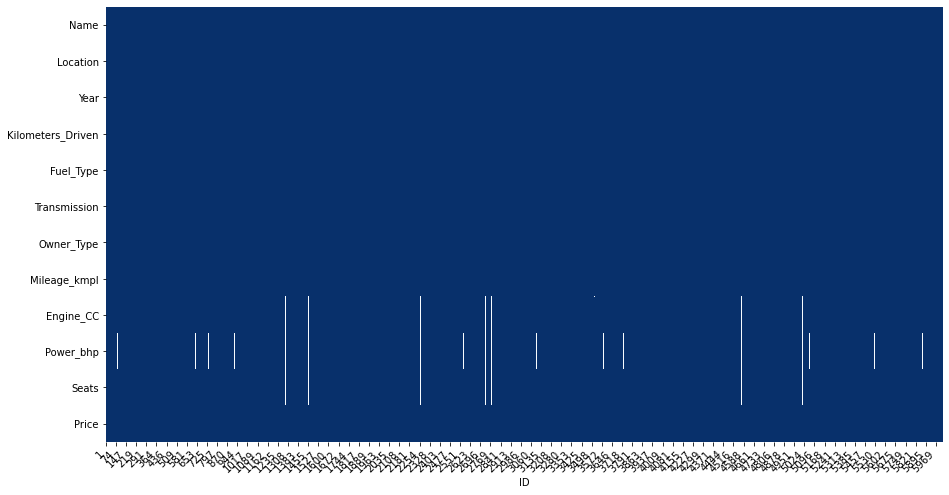

In [8]:
plot_missing_value(df,return_df=True)

In [9]:
df = df.fillna(df.mean())
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Seats                0
Price                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


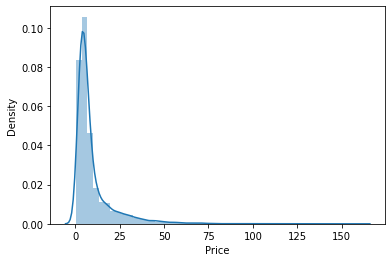

In [10]:
sns.distplot(df['Price']);

In [11]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
       'Seats', 'Price'],
      dtype='object')

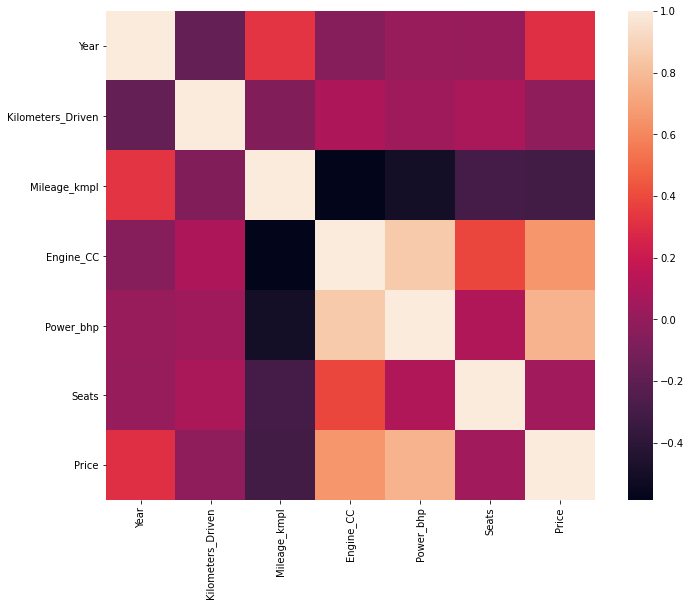

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

In [ ]:
df.corr(method ='pearson')


,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
Year,1.000000,-0.172586,0.326844,-0.051915,0.014586,0.012176,0.306539
Kilometers_Driven,-0.172586,1.000000,-0.066328,0.091235,0.033257,0.083309,-0.011548
Mileage_kmpl,0.326844,-0.066328,1.000000,-0.586719,-0.503670,-0.301293,-0.304743
Engine_CC,-0.051915,0.091235,-0.586719,1.000000,0.857667,0.392079,0.655976
Power_bhp,0.014586,0.033257,-0.503670,0.857667,1.000000,0.096930,0.766876
Seats,0.012176,0.083309,-0.301293,0.392079,0.096930,1.000000,0.049874
Price,0.306539,-0.011548,-0.304743,0.655976,0.766876,0.049874,1.000000


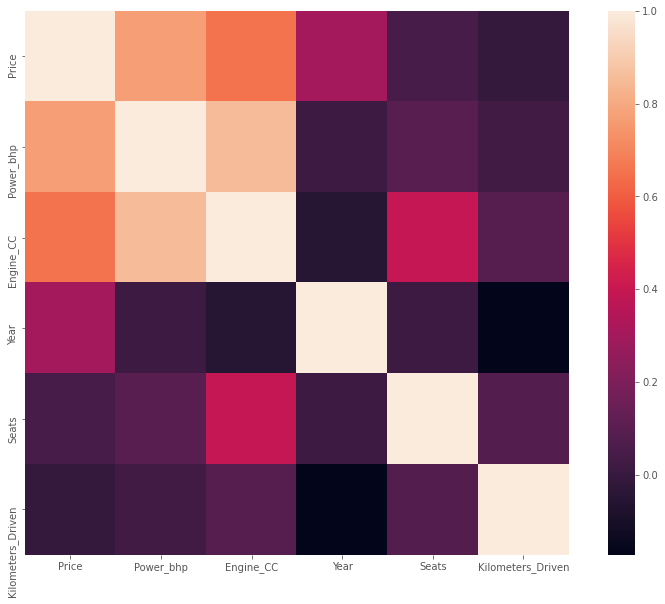

In [ ]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df[cols].corr(), vmax=1, square=True);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


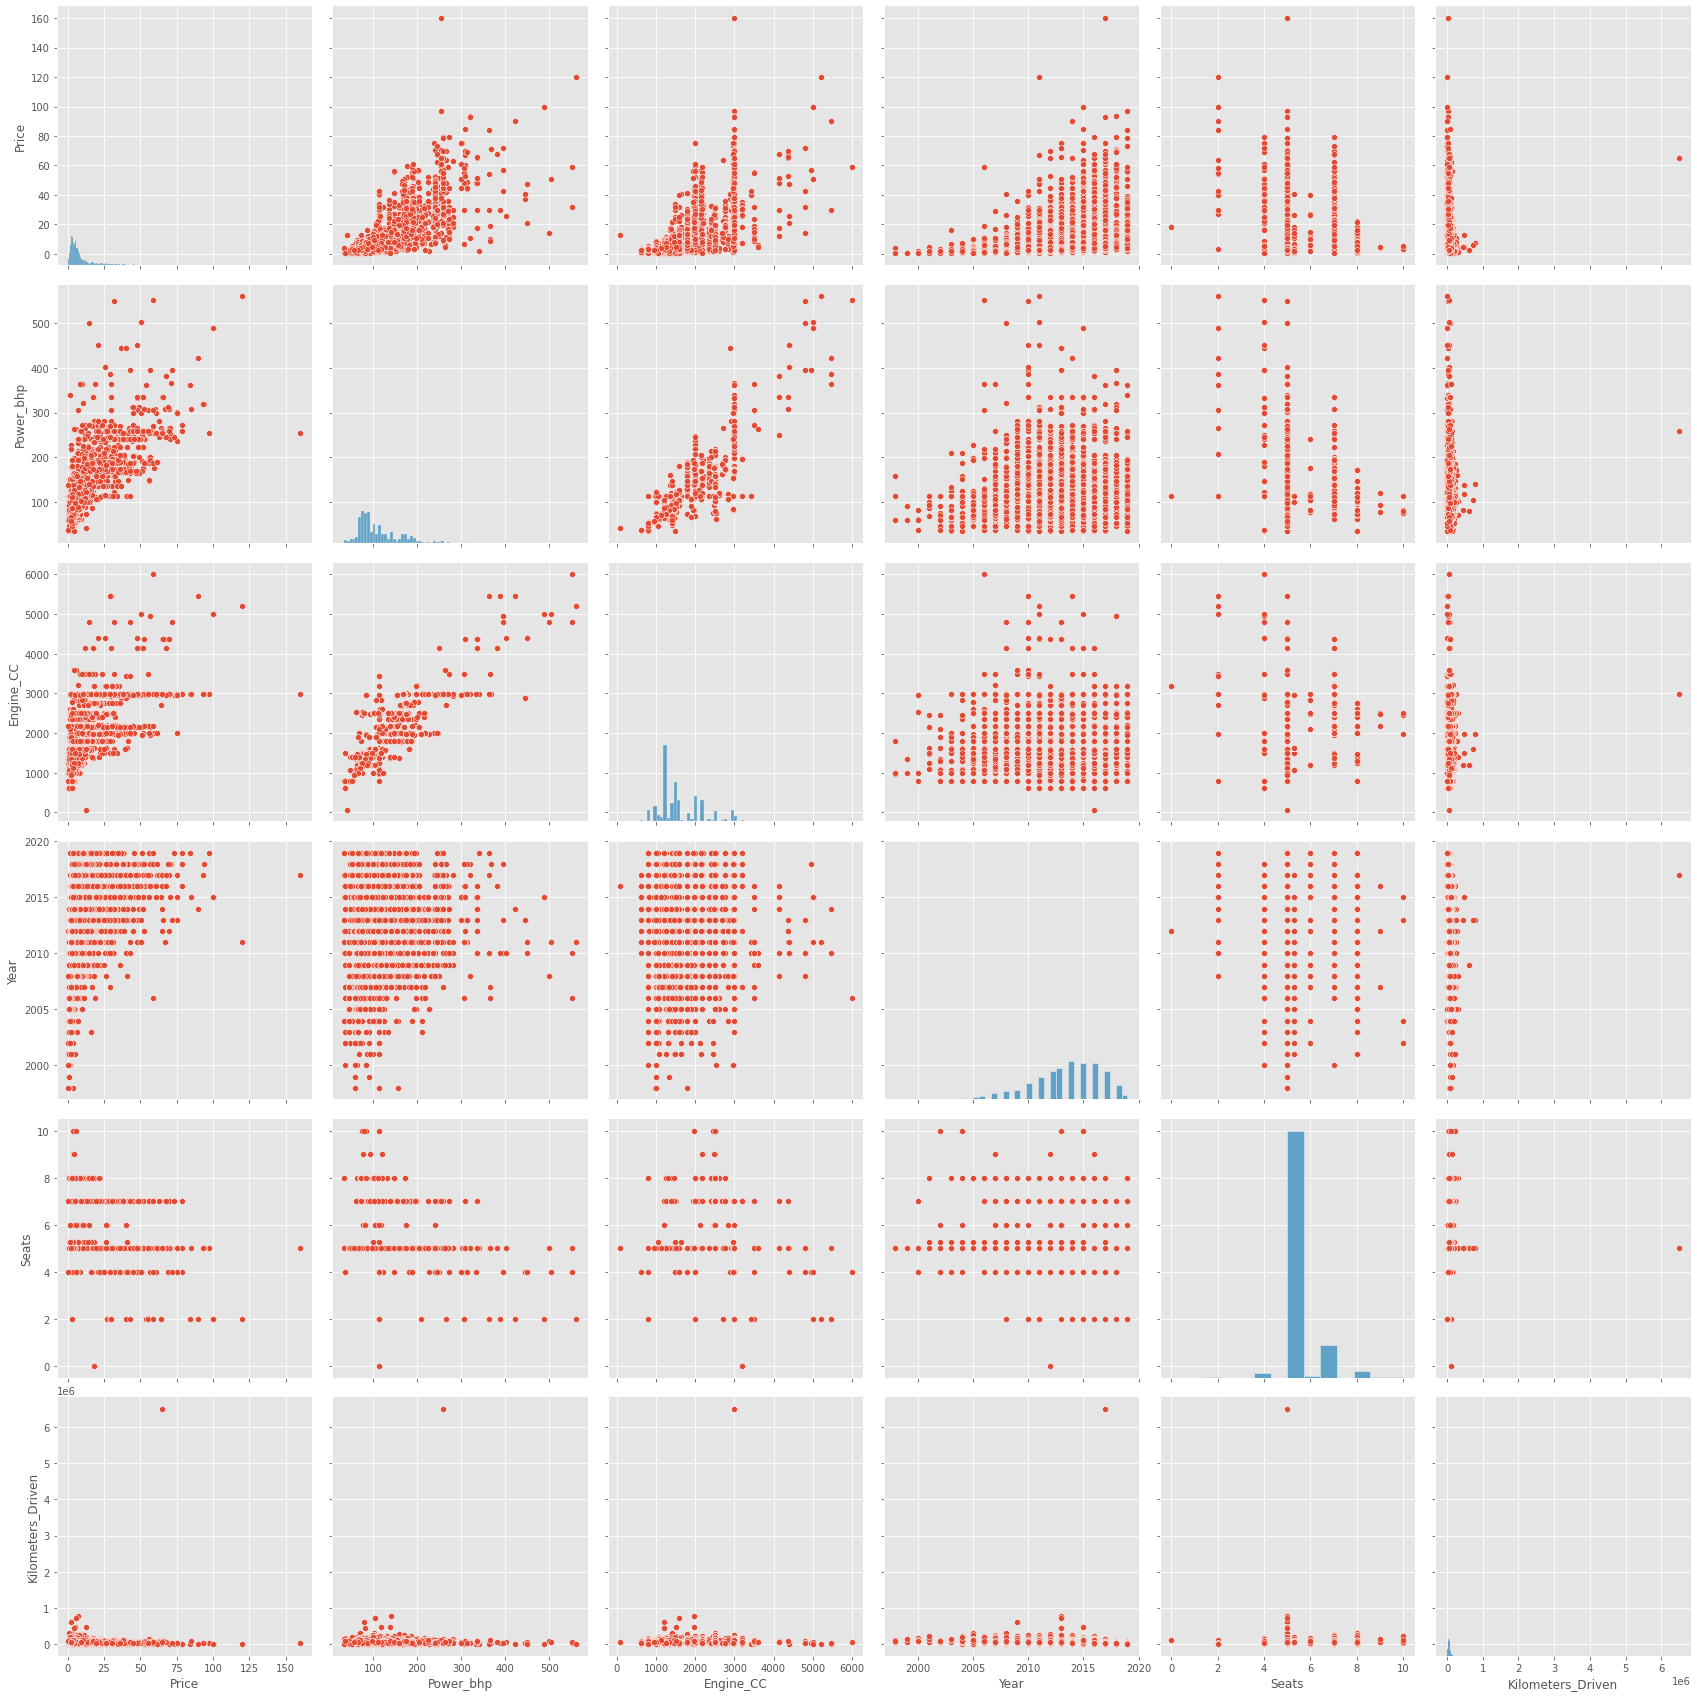

In [ ]:
cols = ['Price', 'Power_bhp','Engine_CC','Year', 'Seats','Kilometers_Driven']
sns.pairplot(df[cols], size = 4);

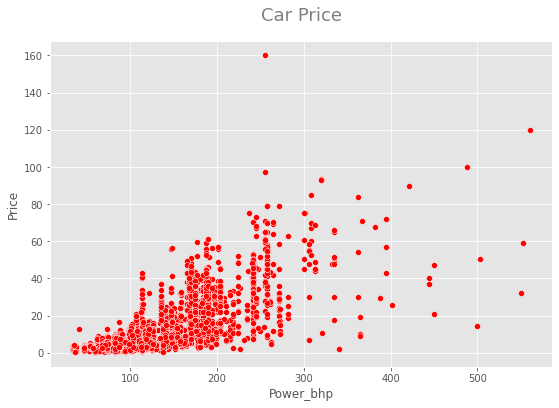

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Power_bhp', y = 'Price', data=df, ax=ax, color='red')

ax.set_title('Car Price', pad=20, size=18, color='gray')

plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_scaterplot.png')

In [ ]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
       'Seats', 'Price'],
      dtype='object')

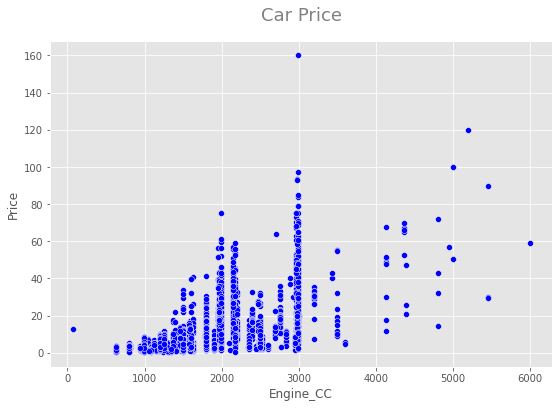

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Engine_CC', y = 'Price', data=df, ax=ax, color='blue')

ax.set_title('Car Price', pad=20, size=18, color='gray')

plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_scaterplot.png')

In [ ]:
x_1 = df['Power_bhp']
y_1 = df['Price']

**Dilihat dari grafik maka kasus linear regression yang tepat antara tv dengan sales**

In [ ]:
m = x_1.values.size
n = y_1.values.size

In [ ]:
m,n

(5953, 5953)

In [ ]:
x = np.append(np.ones((m, 1)), x_1.values.reshape(m, 1), axis=1)
x

array([[  1.  , 126.2 ],
       [  1.  ,  88.7 ],
       [  1.  ,  88.76],
       ...,
       [  1.  , 112.  ],
       [  1.  ,  67.1 ],
       [  1.  ,  57.6 ]])

In [ ]:
y = y_1.values.reshape(m, 1)
y

array([[12.5 ],
       [ 4.5 ],
       [ 6.  ],
       ...,
       [ 2.9 ],
       [ 2.65],
       [ 2.5 ]])

In [ ]:
theta = np.zeros((2, 1))

theta


array([[0.],
       [0.]])

In [ ]:
theta.shape


(2, 1)

**COST FUNCTION**

In [ ]:
def cost_function(x, y, theta):
    y_pred = np.dot(x, theta)
    sqrd_error = (y_pred - y) ** 2
    cost = 1 / (2 * m) * np.sum(sqrd_error)
    
    return cost


In [ ]:
cost_function(x, y, theta)


108.62320605577018

In [ ]:
def gradient_descent(x, y, theta, alpha, iter):
    costs = []
    
    for i in range(iter):
        y_pred = np.dot(x, theta)
        
        
        der = np.dot(x.transpose(), (y_pred - y)) / m
        theta -= alpha * der
        costs.append(cost_function(x, y, theta))
        
    return theta, costs

In [ ]:
theta, costs = gradient_descent(x, y, theta, alpha=0.000038, iter=4000000)

In [ ]:
costs[-1]

25.969369881500555

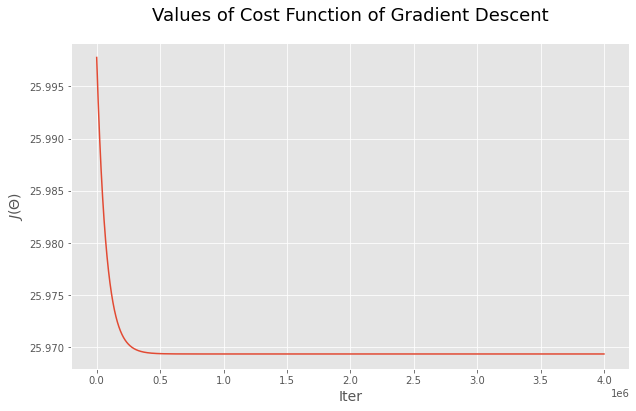

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(costs)

ax.set_title("Values of Cost Function of Gradient Descent", pad=22, size=18, color='black')
ax.set_xlabel("Iter", size=14)
ax.set_ylabel("$J(\Theta)$", size=14)
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_cost_and_iteration.png')

In [ ]:
theta


array([[-8.8581597 ],
       [ 0.16173073]])

In [ ]:
y_pred = np.dot(x, np.round(theta, 3))

dic = {'Sales (Actual)': y.flatten(),
       'Sales (Predicted)': np.round(y_pred, 1).flatten()}

df1 = pd.DataFrame(dic)

In [ ]:
df1.head(100)


,Sales (Actual),Sales (Predicted)
0,12.50,11.6
1,4.50,5.5
2,6.00,5.5
3,17.74,14.0
4,3.50,1.4
...,...,...
95,3.45,9.0
96,4.45,2.0
97,2.65,7.9
98,3.80,5.7


<Figure size 1440x720 with 0 Axes>

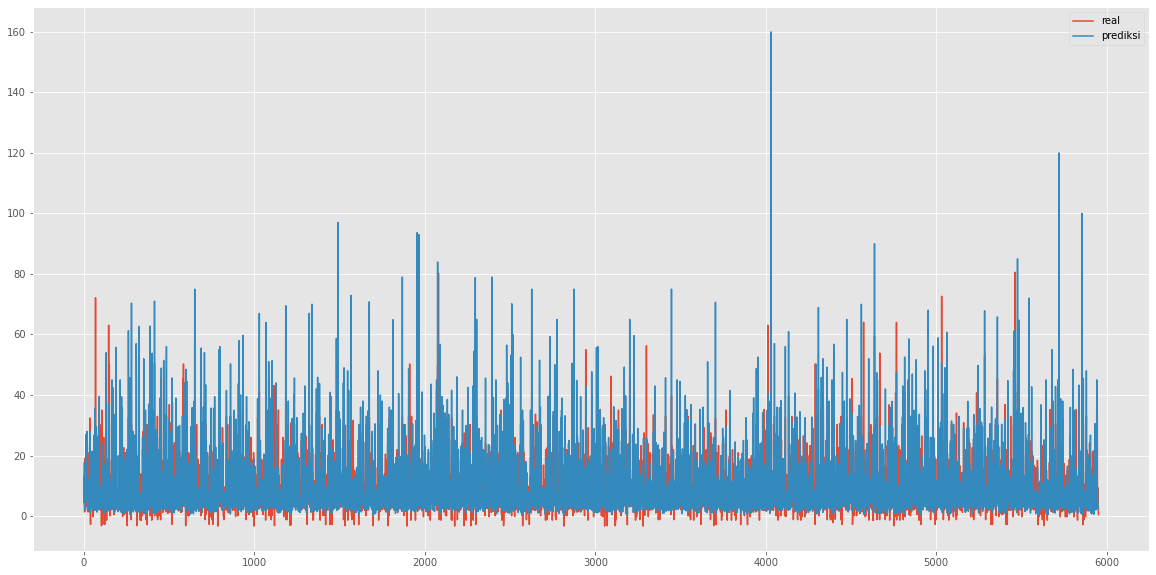

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

df4 = pd.DataFrame({'prediksi': y.flatten() , 'real': y_pred.flatten() }, columns=['real', 'prediksi'])
   
plt.figure()

df4.plot.line()

In [ ]:
def predict(tv_ads):
    x = np.array([1, tv_ads]).reshape(1, 2)
    y_pred = np.dot(x, theta)
    
    return y_pred[0, 0]

In [ ]:
predict(0)


-8.858159703099329

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


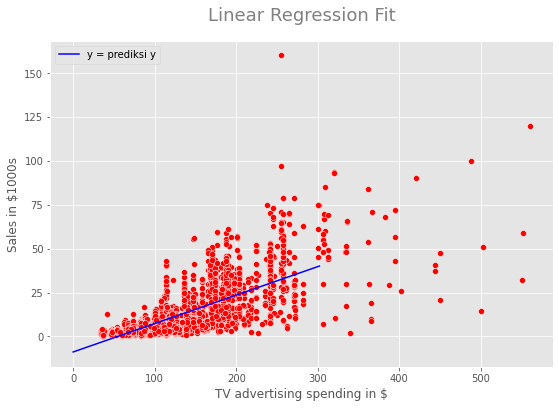

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='Power_bhp', y='Price', data=df, ax=ax, color='red')

# Create random data based on theta and x value
a = np.round(theta, 3)
x_value = np.array(range(0, 303))
# theta + theta * x
y_value = a[0, 0] + (a[1, 0] * x_value)


sns.lineplot(x_value, y_value, ax=ax, label='y = prediksi y', color='blue')

ax.set_title('Linear Regression Fit', pad=20, size=18, color='gray')
ax.set_xlabel('TV advertising spending in $')
ax.set_ylabel('Sales in $1000s')
ax.legend(loc='upper left')
plt.savefig('manual_linear_regression_fit.png')

In [ ]:
R_squared = 0.9 ** 2
MSE = ((y - y_pred) ** 2).sum() / m
RMSE = np.sqrt(MSE)
print('R^2: ', np.round(R_squared, 2))
print('RMSE: ', np.round(RMSE, 2))

R^2:  0.81
RMSE:  7.21


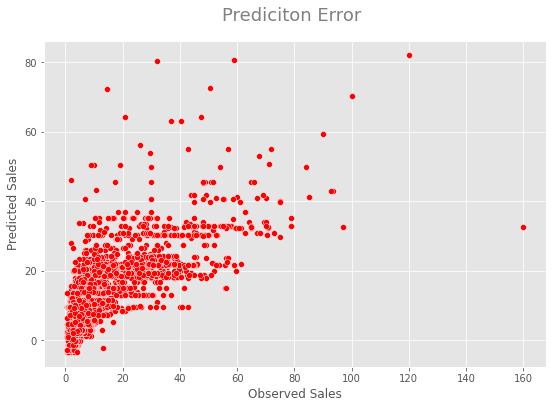

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x=y.flatten(), y=y_pred.flatten(), ax=ax, color='red')

ax.set_title('Prediciton Error ', pad=20, size=18, color='gray')
ax.set_xlabel('Observed Sales')
ax.set_ylabel('Predicted Sales')
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_prediction_error.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


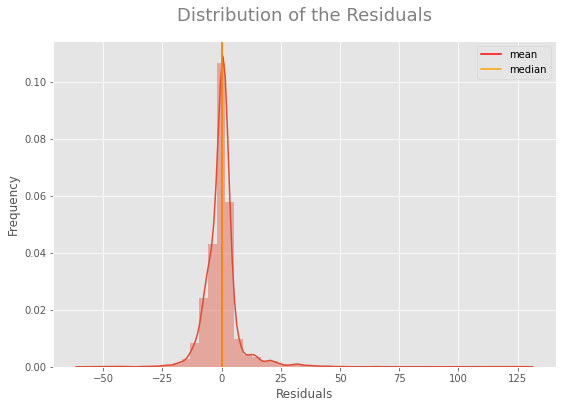

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = (y - y_pred)

sns.distplot(residuals.flatten(), ax=ax)
ax.axvline(x = np.mean(residuals), color='red', label='mean')
ax.axvline(x = np.median(residuals), color='orange', label='median')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Residuals', pad=20, size=18, color='gray')
ax.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_distribution_of_the_residuals.png')

In [ ]:
df.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,12.5


In [ ]:
import pandas as pd

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9f52ff050>,
      dtype=object)

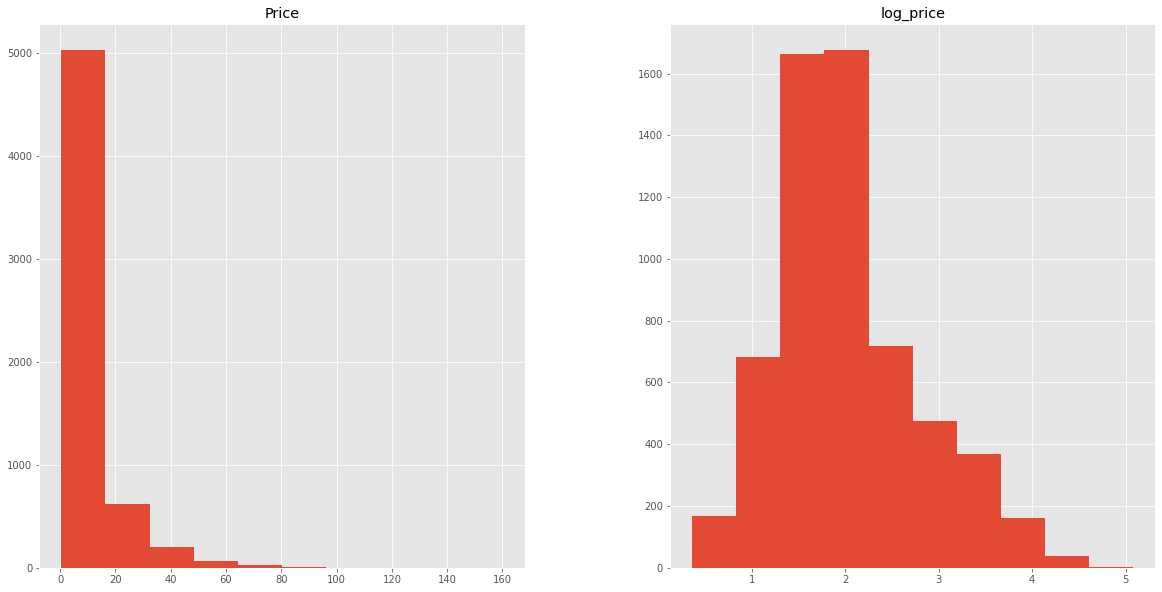

In [ ]:
Price=pd.DataFrame({'Price':df['Price'],'log_price': np.log1p(df['Price'])})
Price.hist()

In [ ]:
df['log_price']=np.log1p(df['Price'])

In [ ]:
x_1 = df['Power_bhp']
y_1 = df['log_price']

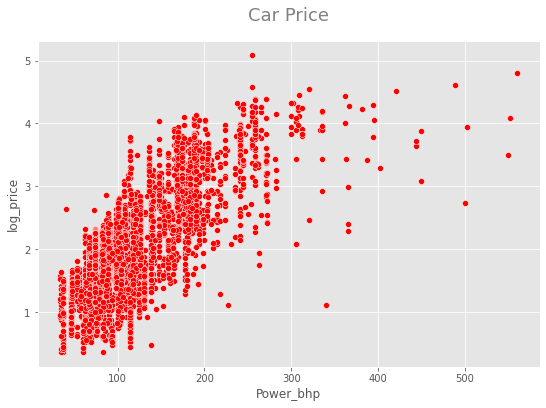

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x='Power_bhp', y = 'log_price', data=df, ax=ax, color='red')

ax.set_title('Car Price', pad=20, size=18, color='gray')

plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_scaterplot.png')

In [ ]:
x = np.append(np.ones((m, 1)), x_1.values.reshape(m, 1), axis=1)
x

array([[  1.  , 126.2 ],
       [  1.  ,  88.7 ],
       [  1.  ,  88.76],
       ...,
       [  1.  , 112.  ],
       [  1.  ,  67.1 ],
       [  1.  ,  57.6 ]])

In [ ]:
y = df['log_price'].values.reshape(m, 1)
y

array([[2.60268969],
       [1.70474809],
       [1.94591015],
       ...,
       [1.36097655],
       [1.29472717],
       [1.25276297]])

In [ ]:
theta = np.zeros((2, 1))

theta

array([[0.],
       [0.]])

In [ ]:
def cost_function(x, y, theta):
    y_pred = np.dot(x, theta)
    sqrd_error = (y_pred - y) ** 2
    cost = 1 / (2 * m) * np.sum(sqrd_error)
    
    return cost

In [ ]:
cost_function(x, y, theta)


2.330800100951312

In [ ]:
def gradient_descent(x, y, theta, alpha, iter):
    costs = []
    
    for i in range(iter):
        y_pred = np.dot(x, theta)
        
        
        der = np.dot(x.transpose(), (y_pred - y)) / m
        theta -= alpha * der
        costs.append(cost_function(x, y, theta))
        
    return theta, costs

In [ ]:
theta, costs = gradient_descent(x, y, theta, alpha=0.000038, iter=4000000)


In [ ]:
costs[-1]

0.11410315119667343

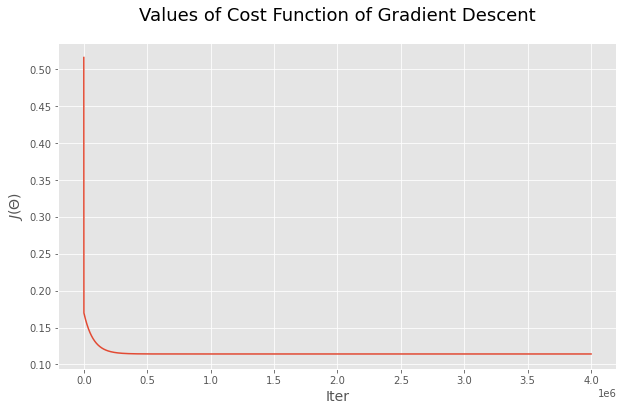

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(costs)

ax.set_title("Values of Cost Function of Gradient Descent", pad=22, size=18, color='black')
ax.set_xlabel("Iter", size=14)
ax.set_ylabel("$J(\Theta)$", size=14)
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_cost_and_iteration.png')


In [ ]:
theta


array([[0.79164648],
       [0.01083718]])

In [ ]:
y_pred = np.dot(x, np.round(theta, 3))

dic = {'Sales (Actual)': y.flatten(),
       'Sales (Predicted)': np.round(y_pred, 1).flatten()}

df1 = pd.DataFrame(dic)

In [ ]:
df1.head(100)


,Sales (Actual),Sales (Predicted)
0,2.602690,2.2
1,1.704748,1.8
2,1.945910,1.8
3,2.930660,2.3
4,1.504077,1.5
...,...,...
95,1.492904,2.0
96,1.695616,1.5
97,1.294727,1.9
98,1.568616,1.8


<Figure size 1440x720 with 0 Axes>

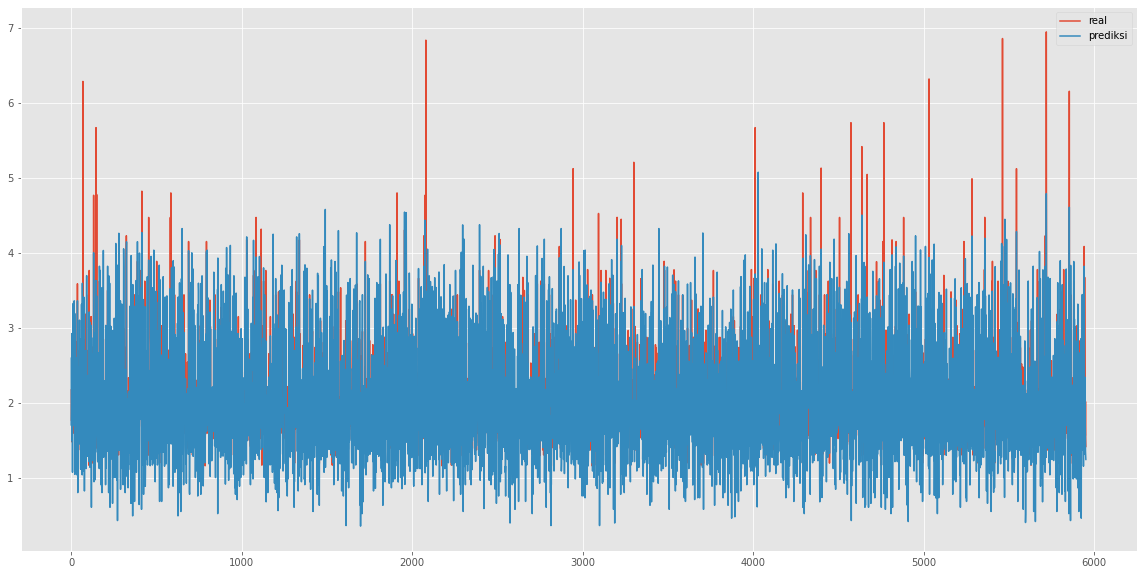

In [ ]:

plt.rcParams["figure.figsize"] = (20,10)

df4 = pd.DataFrame({'prediksi': y.flatten() , 'real': y_pred.flatten() }, columns=['real', 'prediksi'])
   
plt.figure()

df4.plot.line()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


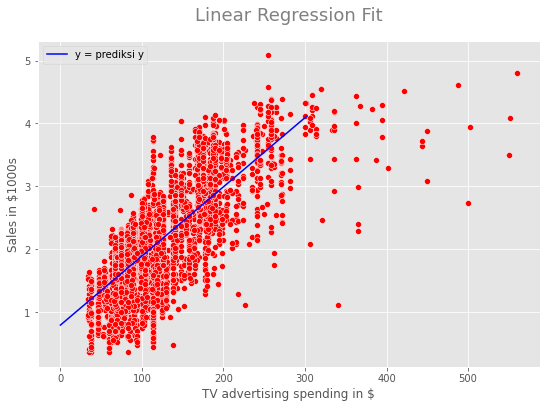

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='Power_bhp', y='log_price', data=df, ax=ax, color='red')

# Create random data based on theta and x value
a = np.round(theta, 3)
x_value = np.array(range(0, 303))
# theta + theta * x
y_value = a[0, 0] + (a[1, 0] * x_value)


sns.lineplot(x_value, y_value, ax=ax, label='y = prediksi y', color='blue')

ax.set_title('Linear Regression Fit', pad=20, size=18, color='gray')
ax.set_xlabel('TV advertising spending in $')
ax.set_ylabel('Sales in $1000s')
ax.legend(loc='upper left')
plt.savefig('manual_linear_regression_fit.png')

In [ ]:
R_squared = 0.9 ** 2
MSE = ((y - y_pred) ** 2).sum() / m
RMSE = np.sqrt(MSE)
print('R^2: ', np.round(R_squared, 2))
print('RMSE: ', np.round(RMSE, 2))


R^2:  0.81
RMSE:  0.48


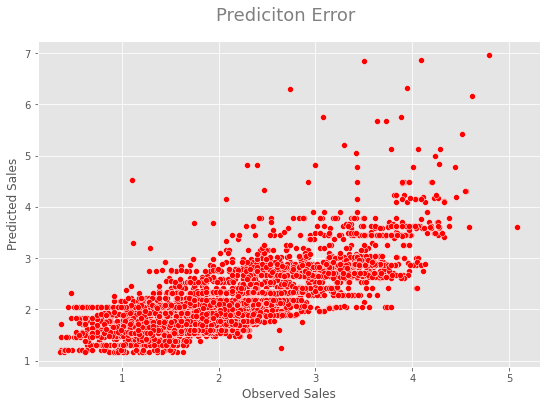

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.scatterplot(x=y.flatten(), y=y_pred.flatten(), ax=ax, color='red')

ax.set_title('Prediciton Error ', pad=20, size=18, color='gray')
ax.set_xlabel('Observed Sales')
ax.set_ylabel('Predicted Sales')
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_prediction_error.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


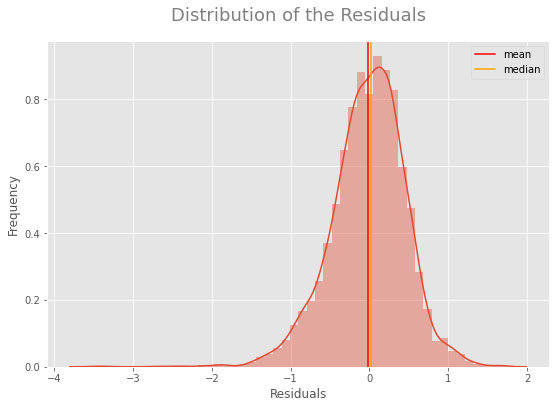

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))

residuals = (y - y_pred)

sns.distplot(residuals.flatten(), ax=ax)
ax.axvline(x = np.mean(residuals), color='red', label='mean')
ax.axvline(x = np.median(residuals), color='orange', label='median')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of the Residuals', pad=20, size=18, color='gray')
ax.legend(loc='upper right')
plt.savefig('/content/drive/My Drive/Colab Notebooks/manual_distribution_of_the_residuals.png')

In [ ]:
!pip install jcopml

**LIBRARY**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [ ]:
# df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/taxi_fare.csv',parse_dates=['pickup_datetime'])
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/carprice.csv',index_col='ID')

df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90


,missing_value,%
Name,0,0.00
Location,0,0.00
Year,0,0.00
Kilometers_Driven,0,0.00
Fuel_Type,0,0.00
Transmission,0,0.00
Owner_Type,0,0.00
Mileage_kmpl,2,0.03
Engine_CC,36,0.60
Power_bhp,142,2.39


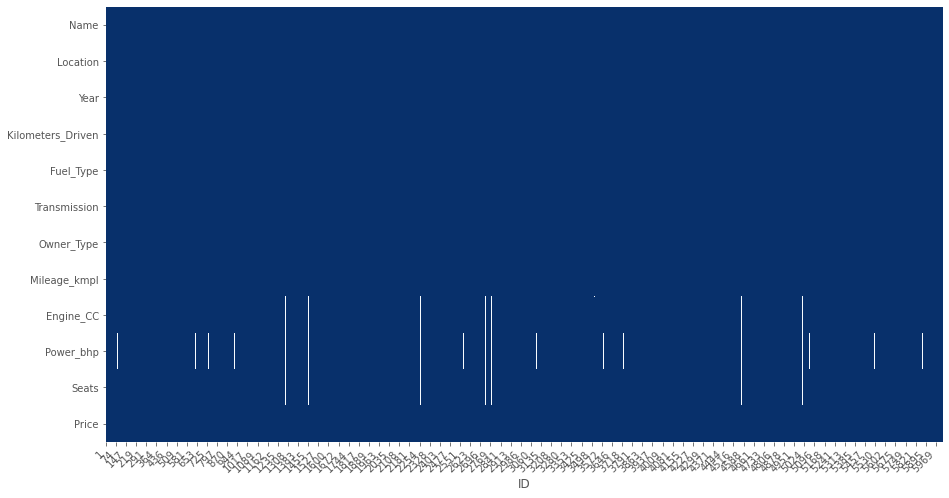

In [ ]:
plot_missing_value(df1,return_df=True)

In [ ]:
df1.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage_kmpl         float64
Engine_CC            float64
Power_bhp            float64
Seats                float64
Price                float64
dtype: object

In [ ]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
       'Seats', 'Price'],
      dtype='object')

,missing_value,%
Name,0,0.00
Location,0,0.00
Year,0,0.00
Kilometers_Driven,0,0.00
Fuel_Type,0,0.00
Transmission,0,0.00
Owner_Type,0,0.00
Mileage_kmpl,2,0.03
Engine_CC,36,0.60
Power_bhp,142,2.39


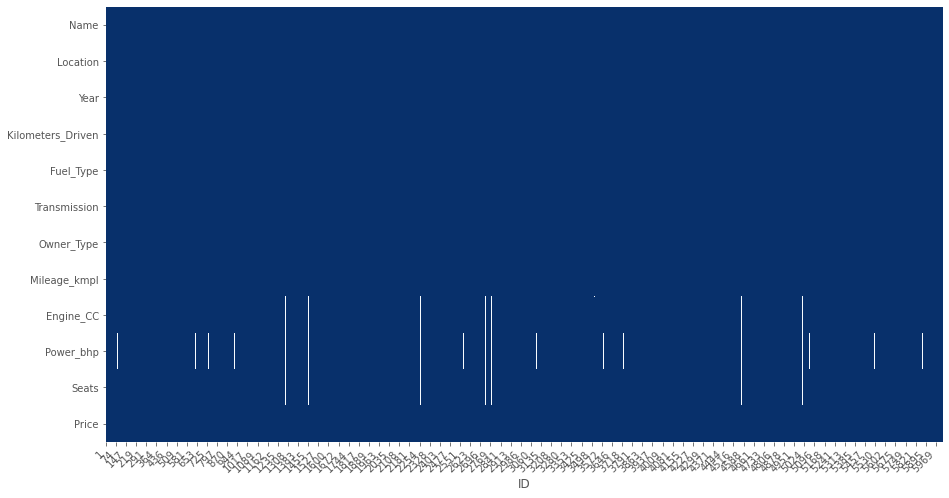

In [ ]:
plot_missing_value(df1,return_df=True)

In [ ]:
df1 = df1.fillna(df1.mean())


,missing_value,%
Name,0,0.0
Location,0,0.0
Year,0,0.0
Kilometers_Driven,0,0.0
Fuel_Type,0,0.0
Transmission,0,0.0
Owner_Type,0,0.0
Mileage_kmpl,0,0.0
Engine_CC,0,0.0
Power_bhp,0,0.0


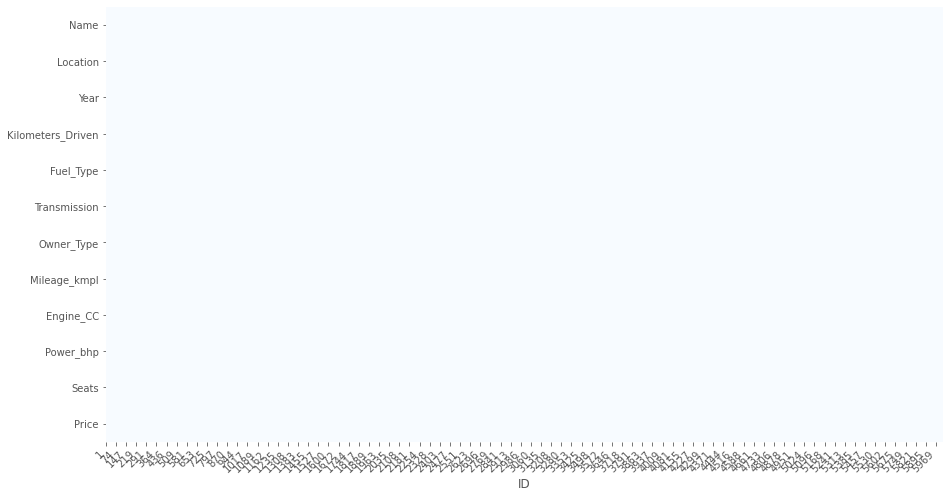

In [ ]:
plot_missing_value(df1,return_df=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


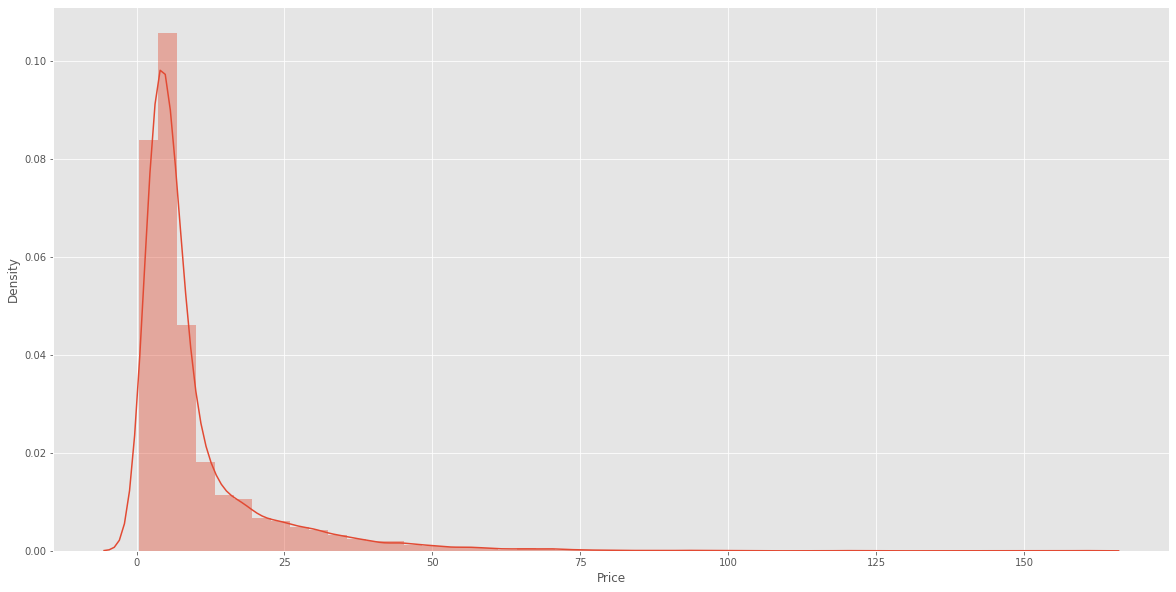

In [ ]:
sns.distplot(df1['Price']);

In [ ]:
X = df1.drop(columns="Price")
y = df1.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 11), (1191, 11), (4762,), (1191,))

In [ ]:
X_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats
ID,,,,,,,,,,,
4380,Maruti Ciaz RS ZXi Plus,Coimbatore,2016,60913,Petrol,Manual,First,20.73,1373.0,91.100000,5.0
2676,Hyundai Creta 1.6 CRDi SX,Kochi,2017,40459,Diesel,Manual,First,19.67,1582.0,126.200000,5.0
647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.00,1086.0,113.803144,5.0
5966,Maruti Wagon R VXI BS IV,Hyderabad,2018,1048,Petrol,Manual,First,18.90,998.0,67.100000,5.0
2198,Ford Fiesta Titanium 1.5 TDCi,Ahmedabad,2013,96000,Diesel,Manual,Second,23.50,1498.0,90.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
3819,Renault Fluence 2.0,Jaipur,2011,63000,Petrol,Automatic,First,13.40,1997.0,135.100000,5.0
5248,Maruti Swift VDI,Ahmedabad,2013,60000,Diesel,Manual,First,22.90,1248.0,74.000000,5.0
5283,Volkswagen Polo 1.2 MPI Highline,Mumbai,2014,13710,Petrol,Manual,First,16.20,1199.0,74.000000,5.0


In [ ]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp',
       'Seats', 'Price'],
      dtype='object')

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Name','Location','Fuel_Type','Transmission','Owner_Type']),
])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = RandomizedSearchCV(pipeline, rsp.linreg_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'algo__fit_intercept': True}
0.9680792932895946 0.8070067192274388 0.7978202766466376


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.9s finished


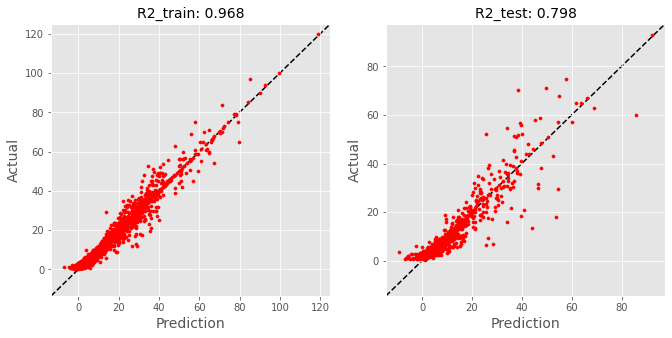

In [ ]:
  from jcopml.plot import plot_actual_vs_prediction,plot_residual
  plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Seats']),
    ('categoric', cat_pipe(encoder='onehot'), ['Name','Location','Fuel_Type','Transmission','Owner_Type']),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = RandomizedSearchCV(pipeline, rsp.linreg_poly_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.9s


{'algo__fit_intercept': True, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.9676277761537846 0.8065964317319869 0.7979789734096809


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   12.8s finished


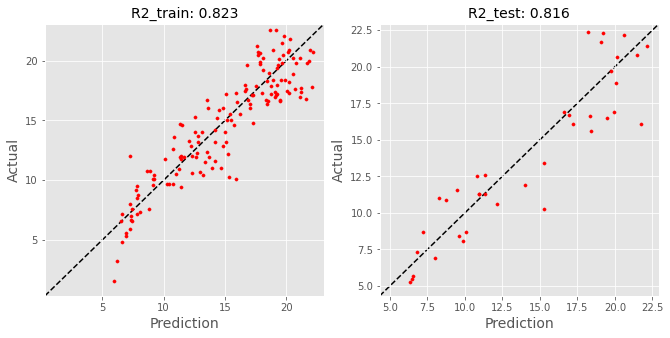

In [ ]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

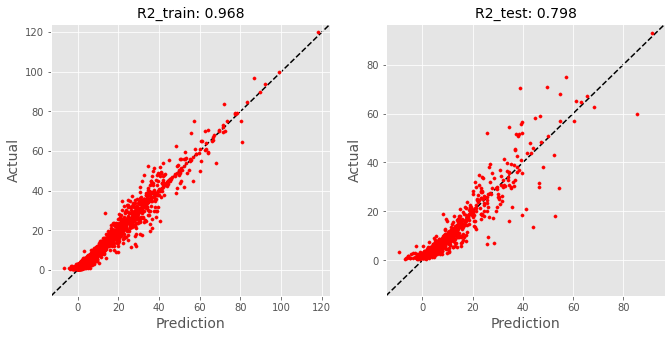

In [ ]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

In [ ]:
from jcopml.feature_importance import mean_score_decrease

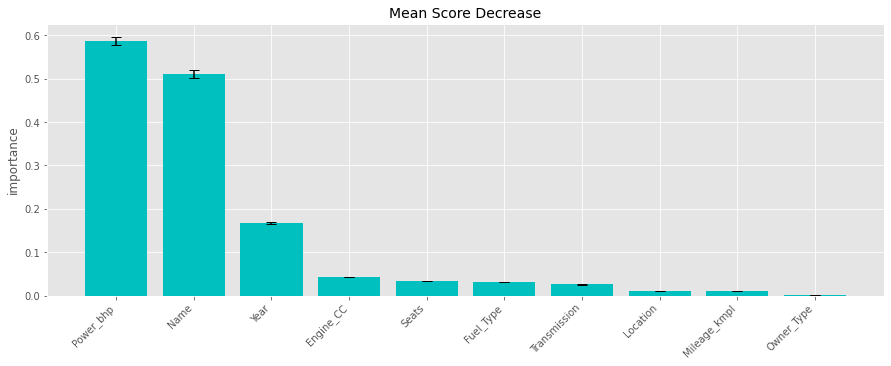

In [ ]:
df_imp = mean_score_decrease(X_train,y_train, model, plot=True, topk=10)

In [ ]:
def submit(model, filename="submit.csv"):
    df_submit = pd.read_csv("data/test.csv", index_col="ID")
    df_submit['Sales'] = model.predict(df_submit)
    df_submit[['Sales']].to_csv(filename, index_label='ID')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


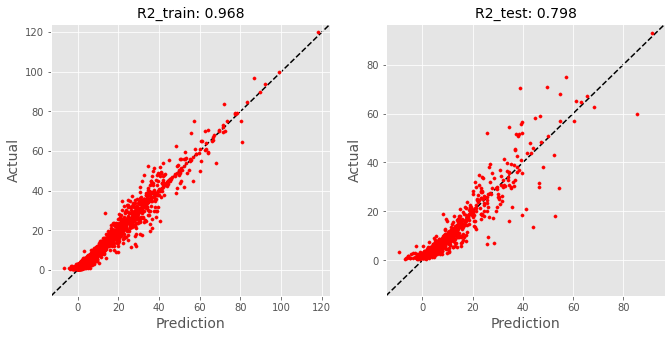

In [ ]:
from jcopml.plot import plot_actual_vs_prediction,plot_residual
plot_actual_vs_prediction(X_train, y_train, X_test,y_test,model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


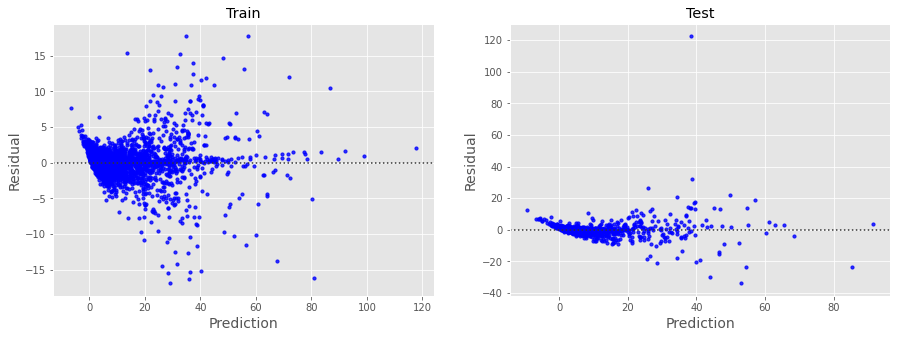

In [ ]:
plot_residual(X_train, y_train, X_test,y_test,model)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=3, n_iter=50, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.5min finished


{'algo__alpha': 69.58780103230367, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.45606998421703604}
0.741766034642977 0.5720220214985816 0.6489650351141845


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75760.3792330706, tolerance: 58.372257422158775
  max_iter, tol, rng, random, positive)


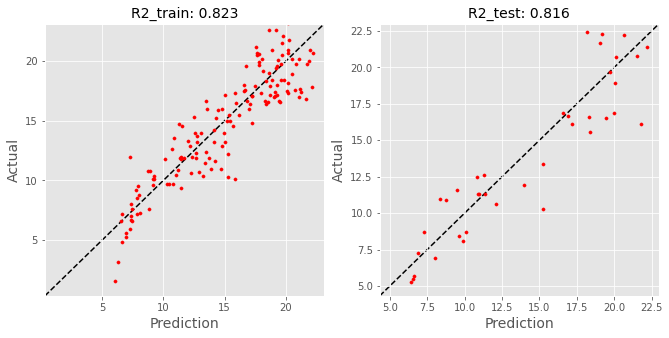

In [ ]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


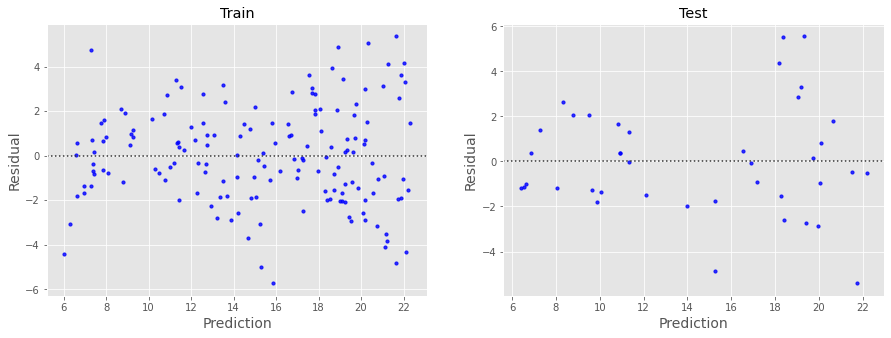

In [ ]:
plot_residual(X_train, y_train, X_test,y_test,model)